In [1]:
import pandas as pd

df_loaded = pd.read_pickle('experiment_results2.pkl')

In [2]:
df_loaded.columns

Index(['experiment_id', 'timestamp', 'function', 'optimizer', 'learning_rate',
       'start_point', 'start_x', 'start_y', 'final_point', 'final_x',
       'final_y', 'final_value', 'iterations', 'runtime', 'converged', 'path',
       'path_array'],
      dtype='object')

In [3]:
df_loaded


columns_to_save = ["optimizer", "learning_rate", "start_x", "start_y", "function", "final_point", "iterations", "runtime", "converged"]
df_subset = df_loaded[columns_to_save]
df_subset.to_csv('experiment_results_subset.csv', index=False)
print(f"Saved {len(df_subset)} rows with columns: {columns_to_save}")


Saved 144 rows with columns: ['optimizer', 'learning_rate', 'start_x', 'start_y', 'function', 'final_point', 'iterations', 'runtime', 'converged']


In [4]:

unique_functions = df_loaded['function'].unique()
print("Unique functions:", unique_functions)


Unique functions: ['convex' 'rosenbrock' 'multimodal']


In [5]:
import matplotlib.pyplot as plt
from Project1 import *
import numpy as np

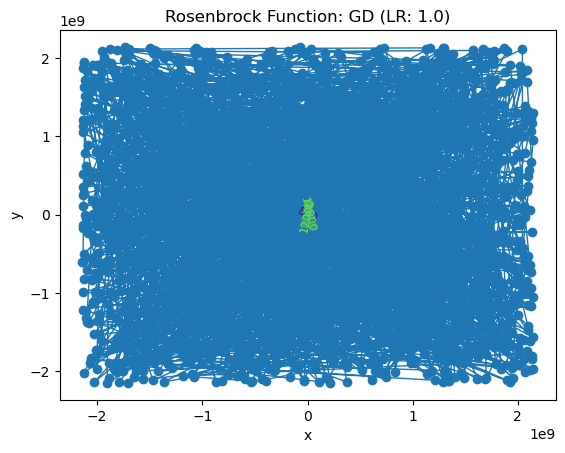

In [6]:


def plot_contours_with_given_path(
        f: C1Differentiable,
        path: np.ndarray,
        xlim: tuple[int, int] = (-3, 3),
        ylim: tuple[int, int] = (-3, 3),
        levels: int = 20,
        title: str = ""
    ):
    xs = np.linspace(xlim[0], xlim[1], 400)
    ys = np.linspace(ylim[0], ylim[1], 400)
    X, Y = np.meshgrid(xs, ys)
    Z = np.zeros_like(X)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = f.forward((X[i, j], Y[i, j]))
    
    plt.figure()
    cs = plt.contour(X, Y, Z, levels=levels)
    plt.clabel(cs, inline=1, fontsize=8)
    
    if len(path) > 0:
        P = np.asarray(path)
        plt.plot(P[:,0], P[:,1], marker='o', linewidth=1)
    
    plt.title(title)
    plt.xlabel('x'); plt.ylabel('y')
    plt.show()


index = 51

path = df_loaded.iloc[index].path_array
diff_function = df_loaded.iloc[index]['function']
optimizer = df_loaded.iloc[index].optimizer
lr = df_loaded.iloc[index].learning_rate if 'learning_rate' in df_loaded.columns else 'N/A'

if diff_function == 'convex':
    f = ConvexBowl()
elif diff_function == 'rosenbrock':
    f = Rosenbrock()
elif diff_function == 'multimodal':
    f = CosineBumps()
else:
    f = ConvexBowl()  

plot_contours_with_given_path(
    f, 
    path, 
    title=f"{diff_function.title()} Function: {optimizer.upper()} (LR: {lr})"
)

In [7]:
df_loaded.iloc[23]

experiment_id                                                   24
timestamp                               2025-09-18T21:21:15.274534
function                                                    convex
optimizer                                                  adagrad
learning_rate                                                 0.01
start_point                                            (0.5, -1.5)
start_x                                                        0.5
start_y                                                       -1.5
final_point            [0.015032783978936606, -0.7270510561385277]
final_x                                                   0.015033
final_y                                                  -0.727051
final_value                                                0.52907
iterations                                                    1999
runtime                                                   0.017112
converged                                                     

In [8]:
def plot_three_contours_side_by_side(
        indices: list[int],
        xlim: tuple[int, int] = (-3, 3),
        ylim: tuple[int, int] = (-3, 3),
        levels: int = 20
    ):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    xs = np.linspace(xlim[0], xlim[1], 400)
    ys = np.linspace(ylim[0], ylim[1], 400)
    X, Y = np.meshgrid(xs, ys)
    
    for i, index in enumerate(indices):
        ax = axes[i]
        
        path = df_loaded.iloc[index].path_array
        diff_function = df_loaded.iloc[index]['function']
        optimizer = df_loaded.iloc[index].optimizer
        lr = df_loaded.iloc[index].learning_rate if 'learning_rate' in df_loaded.columns else 'N/A'
        
        if diff_function == 'convex':
            f = ConvexBowl()
        elif diff_function == 'rosenbrock':
            f = Rosenbrock()
        elif diff_function == 'multimodal':
            f = CosineBumps()
        else:
            f = ConvexBowl()
        
        Z = np.zeros_like(X)
        for row in range(X.shape[0]):
            for col in range(X.shape[1]):
                Z[row, col] = f.forward((X[row, col], Y[row, col]))
        
        cs = ax.contour(X, Y, Z, levels=levels)
        ax.clabel(cs, inline=1, fontsize=8)
        
        if len(path) > 0:
            P = np.asarray(path)
            ax.plot(P[:,0], P[:,1], marker='o', linewidth=1)
        
        ax.set_title(f"{diff_function.title()} Function: {optimizer.upper()} (LR: {lr})")
        ax.set_xlabel('x')
        ax.set_ylabel('y')
    
    plt.tight_layout()
    plt.show()


In [9]:
print("hei")

hei


# MultiModal


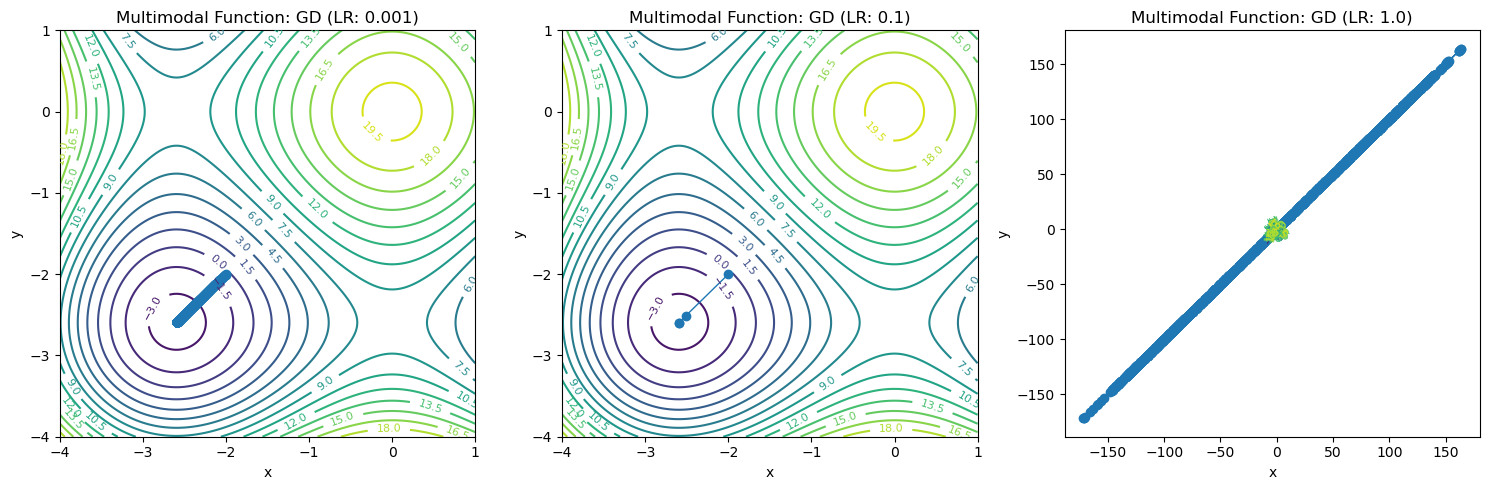

In [15]:
plot_three_contours_side_by_side([96, 98, 99], ylim=(-4, 1), xlim=(-4, 1))


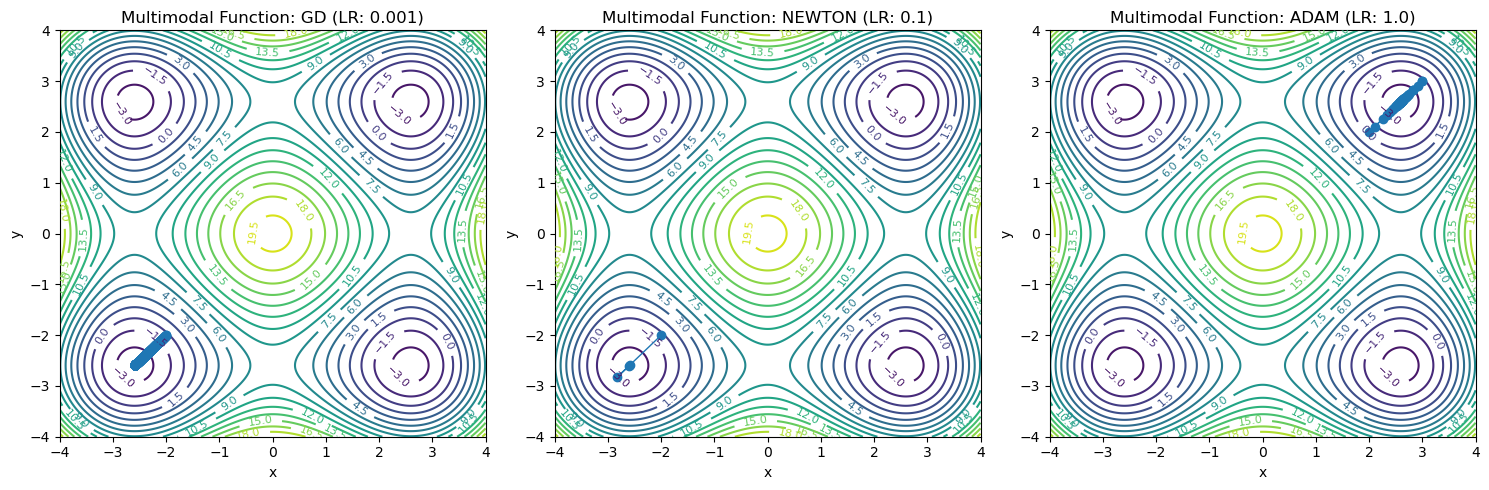

In [33]:
plot_three_contours_side_by_side([96, 100, 143], ylim=(-4, 4), xlim=(-4, 4))



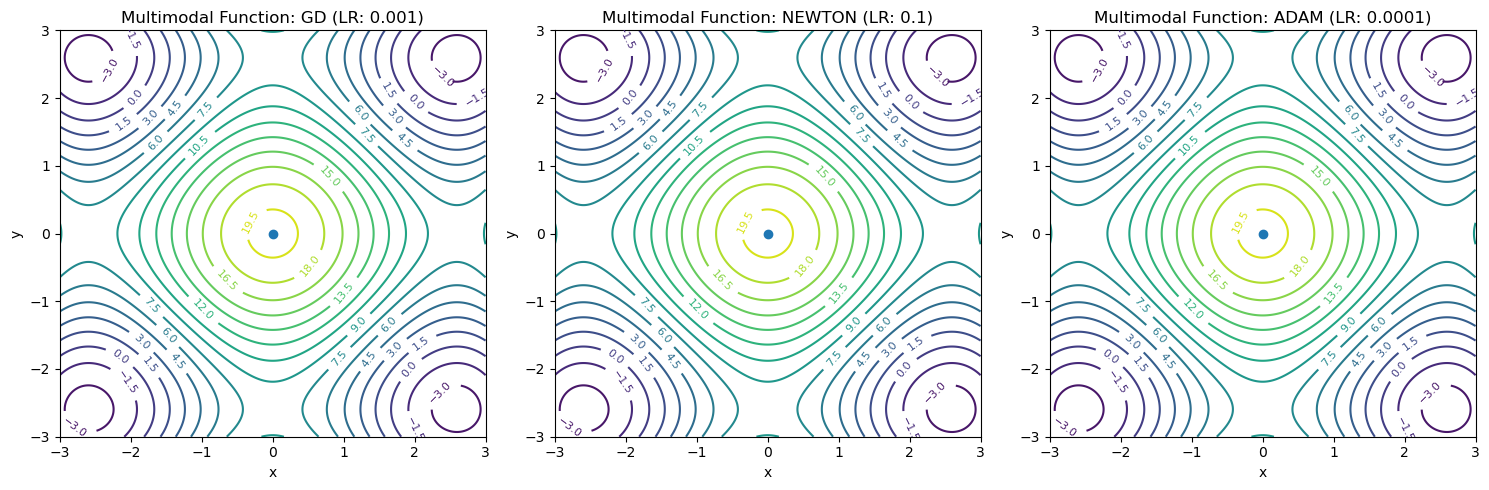

In [45]:
plot_three_contours_side_by_side([112,116,123])

# RosenBROCK


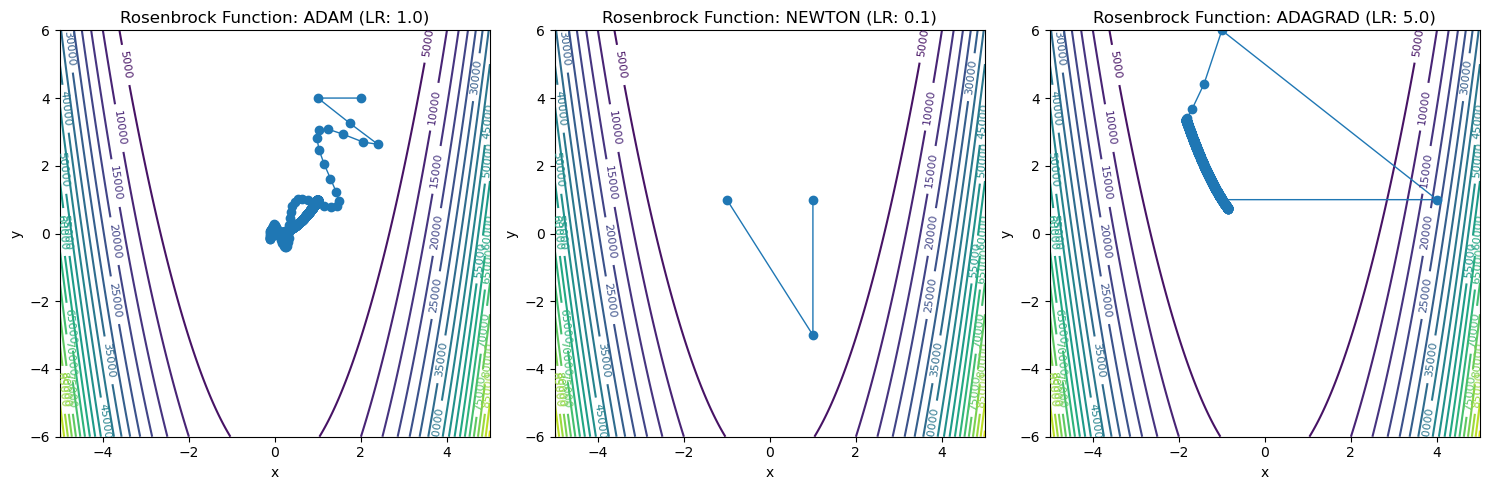

In [56]:
plot_three_contours_side_by_side([95,52,58], xlim=(-5,5), ylim=(-6,6))


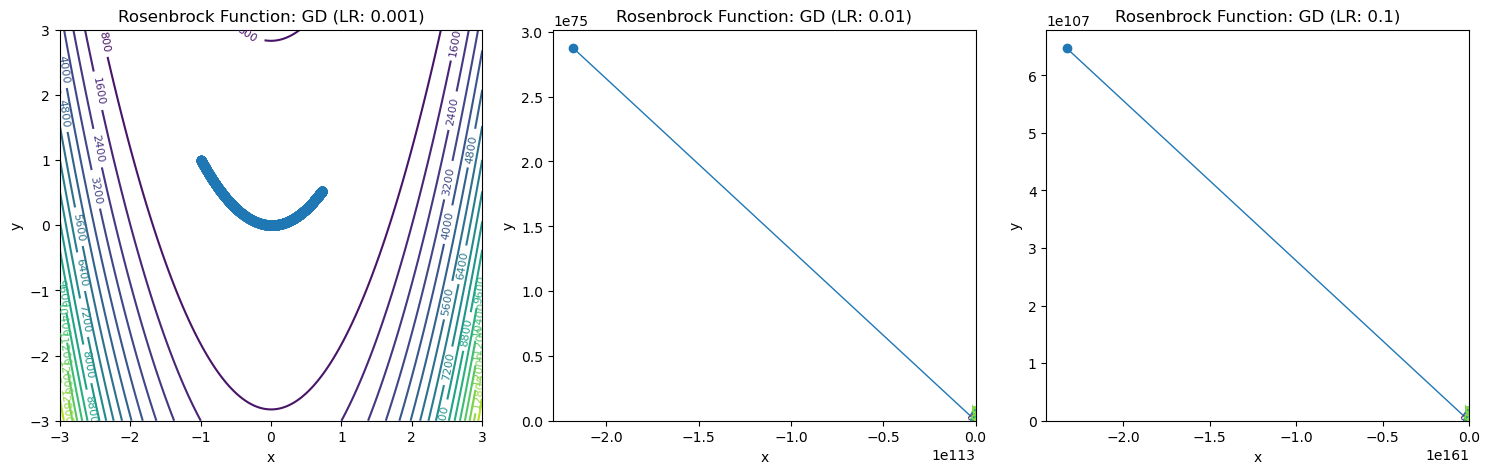

In [51]:
plot_three_contours_side_by_side([48,49,50])


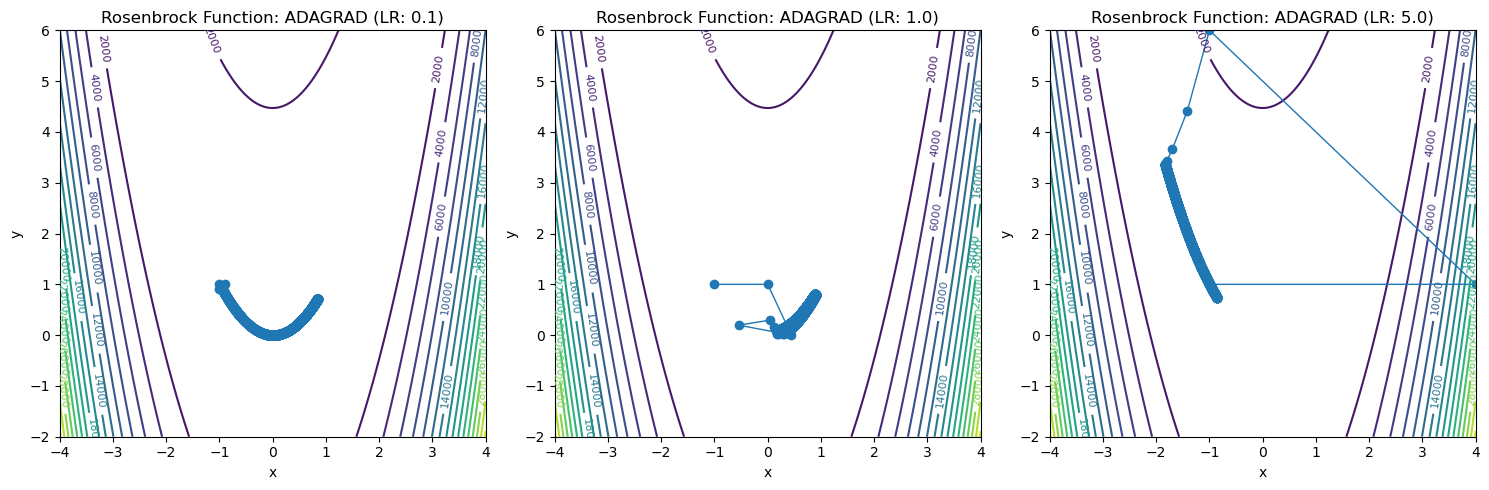

In [54]:
plot_three_contours_side_by_side([56,57,58], xlim=(-4,4), ylim=(-2,6))
